In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [ ]:
# open without stopword cleaned datasets
pos_train_no_stopword=open("../input/positive/train_no_stopword.csv")
pos_val_no_stopword=open("../input/positive/val_no_stopword.csv")
pos_test_no_stopword=open("../input/positive/test_no_stopword.csv")

neg_train_no_stopword=open("../input/negative/train_no_stopword.csv")
neg_val_no_stopword=open("../input/negative/val_no_stopword.csv")
neg_test_no_stopword=open("../input/negative/test_no_stopword.csv")

# Read without stopword cleaned datasets by line
pos_nostop_train=pos_train_no_stopword.read().split('\n')
pos_nostop_val=pos_val_no_stopword.read().split('\n')
pos_nostop_test=pos_test_no_stopword.read().split('\n')
neg_nostop_train=neg_train_no_stopword.read().split('\n')
neg_nostop_val=neg_val_no_stopword.read().split('\n')
neg_nostop_test=neg_test_no_stopword.read().split('\n')
# Convert without stopword cleaned datasets to DataFrame
pos_nostop_train= pd.DataFrame(pos_nostop_train, columns=["Clean_text"])
pos_nostop_val= pd.DataFrame(pos_nostop_val, columns=["Clean_text"])
pos_nostop_test= pd.DataFrame(pos_nostop_test, columns=["Clean_text"])
neg_nostop_train= pd.DataFrame(neg_nostop_train, columns=["Clean_text"])
neg_nostop_val= pd.DataFrame(neg_nostop_val, columns=["Clean_text"])
neg_nostop_test= pd.DataFrame(neg_nostop_test, columns=["Clean_text"])
# Add a new column 'Sentiment'
pos_nostop_train["Sentiment"]=1
pos_nostop_val["Sentiment"]=1
pos_nostop_test["Sentiment"]=1
neg_nostop_train["Sentiment"]=0
neg_nostop_val["Sentiment"]=0
neg_nostop_test["Sentiment"]=0
# Combine all the datasets above 
nostop= shuffle(pd.concat([pos_nostop_train, neg_nostop_train,pos_nostop_val,neg_nostop_val,pos_nostop_test, neg_nostop_test]))


In [ ]:
# open with stopword cleaned datasets
pos_train_stopword=open("../input/positive/train.csv")
pos_val_stopword=open("../input/positive/val.csv")
pos_test_stopword=open("../input/positive/test.csv")
neg_train_stopword=open("../input/negative/train.csv")
neg_val_stopword=open("../input/negative/val.csv")
neg_test_stopword=open("../input/negative/test.csv")
# Read with stopword cleaned datasets by line
pos_train=pos_train_stopword.read().split('\n')
pos_val=pos_val_stopword.read().split('\n')
pos_test=pos_test_stopword.read().split('\n')
neg_train=neg_train_stopword.read().split('\n')
neg_val=neg_val_stopword.read().split('\n')
neg_test=neg_test_stopword.read().split('\n')
# Convert with stopword cleaned datasets to DataFrame
pos_train= pd.DataFrame(pos_train, columns=["Clean_text"])
pos_val= pd.DataFrame(pos_val, columns=["Clean_text"])
pos_test= pd.DataFrame(pos_test, columns=["Clean_text"])
neg_train= pd.DataFrame(neg_train, columns=["Clean_text"])
neg_val= pd.DataFrame(neg_val, columns=["Clean_text"])
neg_test= pd.DataFrame(neg_test, columns=["Clean_text"])
# Add a new column 'Sentiment'
pos_train["Sentiment"]=1
pos_val["Sentiment"]=1
pos_test["Sentiment"]=1
neg_train["Sentiment"]=0
neg_val["Sentiment"]=0
neg_test["Sentiment"]=0
# Combine all the datasets above
stop= shuffle(pd.concat([pos_train, neg_train,pos_val,neg_val,pos_test, neg_test]))
stop.head(12)

/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Text(0, 0.5, 'accurate_rate')

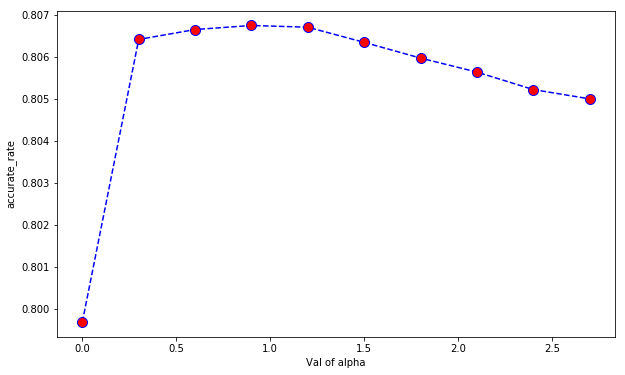

In [115]:
# Tune the parameter of alpha

#Unigram LM without stopword dataset
vectorizer = CountVectorizer(ngram_range=(1, 1))
text_counts = vectorizer.fit_transform(nostop["Clean_text"])
X=text_counts
y=nostop["Sentiment"]

# Split the dataset to train, validate, and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

accurate_rate = []
for i in np.arange(0.0, 3.0, 0.3):
    clf = MultinomialNB(alpha=i).fit(X_train, y_train)
    predicted= clf.predict(X_val)
    # print("MultinomialNB Accuracy:",metrics.accuracy_score(y_nostop_val, predicted))
    accurate_rate.append(metrics.accuracy_score(y_val, predicted))


plt.figure(figsize=(10,6))
plt.plot(np.arange(0.0, 3.0, 0.3),accurate_rate, color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('Val of alpha')
plt.ylabel('accurate_rate')

In [111]:
# Unigram LM without stopword dataset MultinomialNB Accuracy
vectorizer = CountVectorizer(ngram_range=(1, 1))
text_counts = vectorizer.fit_transform(nostop["Clean_text"])
X=text_counts
y=nostop["Sentiment"]
    # Split the dataset to train, validate, and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

    # Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB(alpha = 0.9).fit(X_train, y_train)
predicted= clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
score=metrics.accuracy_score(y_test, predicted) 
print("Unigram LM without stopword dataset MultinomialNB Accuracy:",score)


Unigram LM with no stopword dataset MultinomialNB Accuracy: 0.8084523943450707


In [112]:
# Bigram LM without stopword dataset MultinomialNB Accuracy
vectorizer = CountVectorizer(ngram_range=(2, 2))
text_counts = vectorizer.fit_transform(nostop["Clean_text"])
X=text_counts
y=nostop["Sentiment"]
    # Split the dataset to train, validate, and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

    # Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB(alpha = 0.9).fit(X_train, y_train)
predicted= clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
score=metrics.accuracy_score(y_test, predicted) 
print("Bigram LM without stopword dataset MultinomialNB Accuracy:",score)


Bigram LM without stopword dataset MultinomialNB Accuracy: 0.8236022049724379


In [113]:
# Unigram and Bigram LM without stopword dataset MultinomialNB Accuracy
vectorizer = CountVectorizer(ngram_range=(1, 2))
text_counts = vectorizer.fit_transform(nostop["Clean_text"])
X=text_counts
y=nostop["Sentiment"]
    # Split the dataset to train, validate, and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

    # Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB(alpha = 0.9).fit(X_train, y_train)
predicted= clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
score=metrics.accuracy_score(y_test, predicted) 
print("Unigram and Bigram LM without stopword dataset MultinomialNB Accuracy:",score)


Unigram and Bigram LM without stopword dataset MultinomialNB Accuracy: 0.8329395882551468


In [116]:
# Unigram LM with stopword dataset MultinomialNB Accuracy
vectorizer = CountVectorizer(ngram_range=(1, 1))
text_counts = vectorizer.fit_transform(stop["Clean_text"])
X=text_counts
y=stop["Sentiment"]
    # Split the dataset to train, validate, and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

    # Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB(alpha = 0.9).fit(X_train, y_train)
predicted= clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
score=metrics.accuracy_score(y_test, predicted) 
print("Unigram LM with stopword dataset MultinomialNB Accuracy:",score)

Unigram LM with stopword dataset MultinomialNB Accuracy: 0.8048524393445082


In [117]:
# Bigram LM with stopword dataset MultinomialNB Accuracy
vectorizer = CountVectorizer(ngram_range=(2, 2))
text_counts = vectorizer.fit_transform(stop["Clean_text"])
X=text_counts
y=stop["Sentiment"]
    # Split the dataset to train, validate, and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

    # Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB(alpha = 0.9).fit(X_train, y_train)
predicted= clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
score=metrics.accuracy_score(y_test, predicted) 
print("Bigram LM with stopword dataset MultinomialNB Accuracy:",score)


Bigram LM with stopword dataset MultinomialNB Accuracy: 0.7889526380920239


In [118]:
# Unigram and Bigram LM with stopword dataset MultinomialNB Accuracy
vectorizer = CountVectorizer(ngram_range=(1, 2))
text_counts = vectorizer.fit_transform(stop["Clean_text"])
X=text_counts
y=stop["Sentiment"]
    # Split the dataset to train, validate, and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

    # Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB(alpha = 0.9).fit(X_train, y_train)
predicted= clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
score=metrics.accuracy_score(y_test, predicted) 
print("Unigram and Bigram LM with stopword dataset MultinomialNB Accuracy:",score)


Unigram and Bigram LM with stopword dataset MultinomialNB Accuracy: 0.8235272059099261
